In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy.special as sc
from scipy.integrate import odeint
import utility as psu
import scipy.integrate as integ
from scipy.optimize import curve_fit
from scipy import stats
import time
from matplotlib.colors import LogNorm
from numpy.random import randn
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
import os
import process_abalone_utility as pau

/data/abalone/ABALONE_RampingUp/2021_08_03_T1026_ABALONE_15kV_SiPM2_32V_LED300V.dat Number of events 594924.0
Total events number: 594924
event n. 0 time to process: 0.02
event n. 100000 time to process: 10.86
event n. 200000 time to process: 21.65
event n. 300000 time to process: 32.55
event n. 400000 time to process: 43.38
event n. 500000 time to process: 54.38


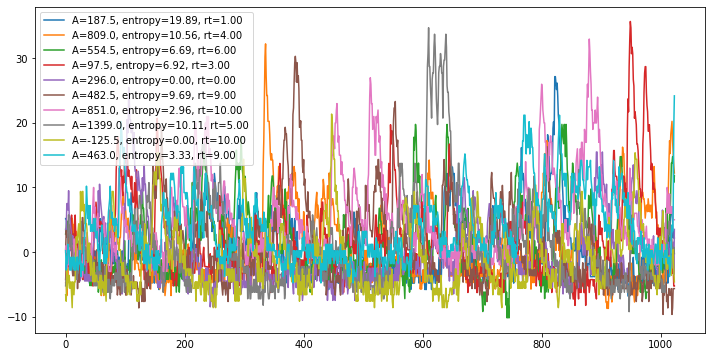

In [2]:
file_LED = '/data/abalone/ABALONE_RampingUp/2021_08_03_T1026_ABALONE_15kV_SiPM2_32V_LED300V.dat'
dataLED = pau.process_abalone_data(filename=file_LED,nn=0,nplot=10,w=10)

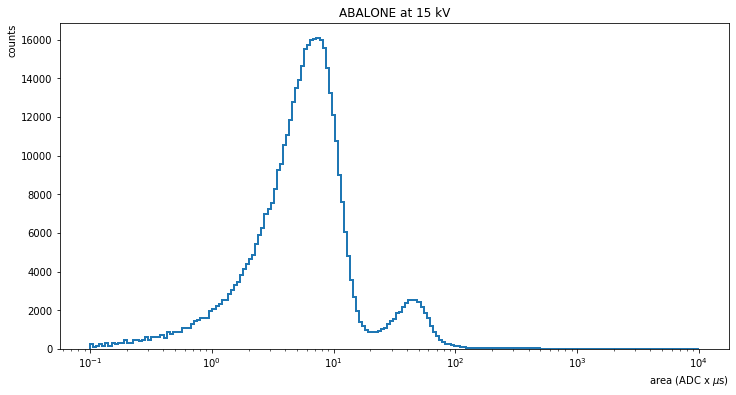

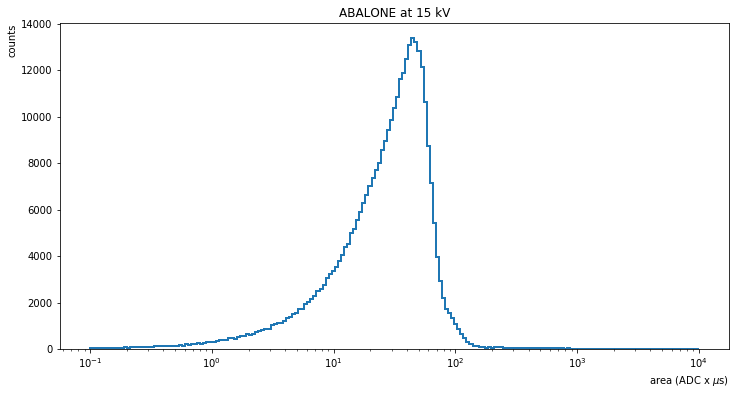

<Figure size 864x432 with 0 Axes>

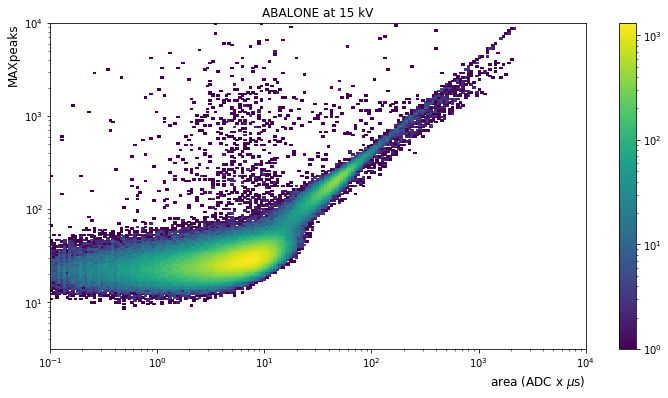

<Figure size 864x432 with 0 Axes>

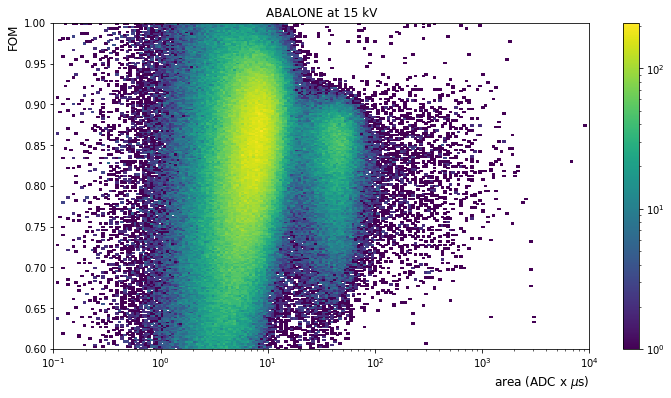

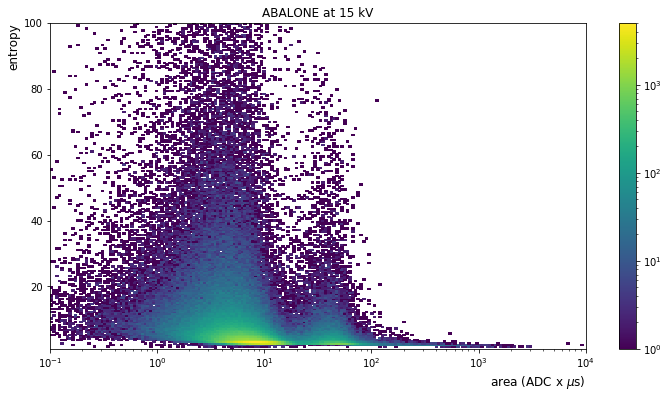

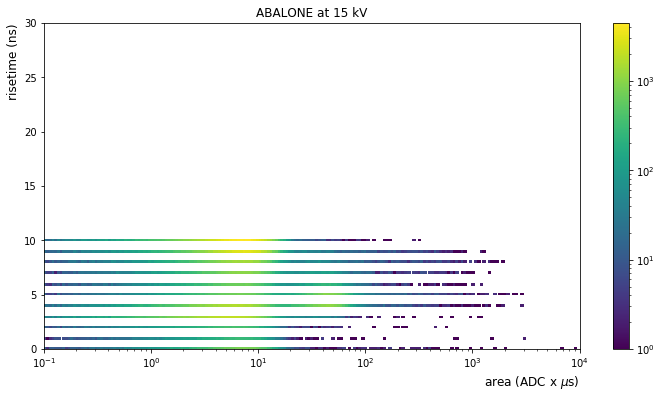

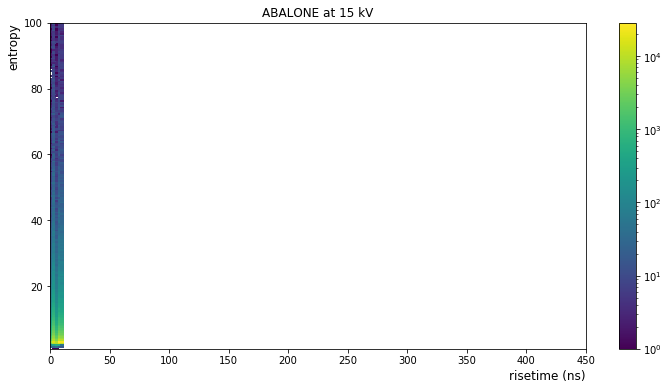

In [3]:
pau.plot_data(data=dataLED,fvolt=15,low=-1, high=4,low_max=0.5,high_max=4,low_en=1, high_en=100,
              low_fom=0.6,high_fom=1,high_rt=30)

/data/abalone/ABALONE_RampingUp/2021_08_03_T1026_ABALONE_15kV_SiPM2_32V_LED300V.dat Number of events 594924.0
n. events 0 waveform samples 1024
Events rejected by areaup 0 -> 0.0 %

n. events 109004 waveform samples 1024
Events rejected by areadown 109004 -> 18.322340332546677 %

n. events 0 waveform samples 1024
Events rejected by entropy 0 -> 0.0 %

n. events 0 waveform samples 1024
Events rejected by max 0 -> 0.0 %

n. events 218 waveform samples 1024
Events rejected by risetime 218 -> 0.036643335955517005 %

n. events 521216 waveform samples 1024
Events rejected by max position 521216 -> 87.6105183183062 %

n. events 53146 waveform samples 1024
Events selected  53146 -> 8.933241893082142 %


<Figure size 864x432 with 0 Axes>

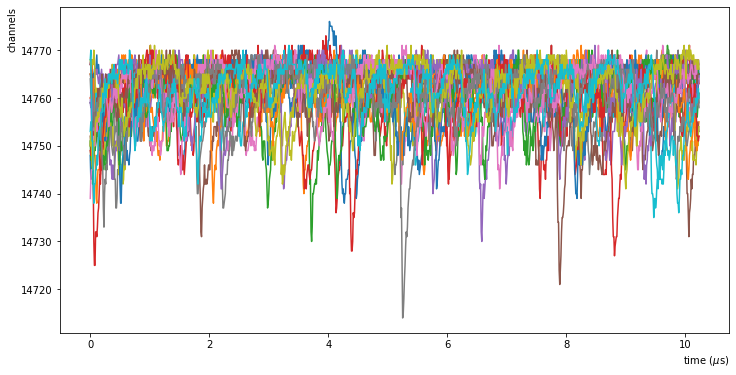

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

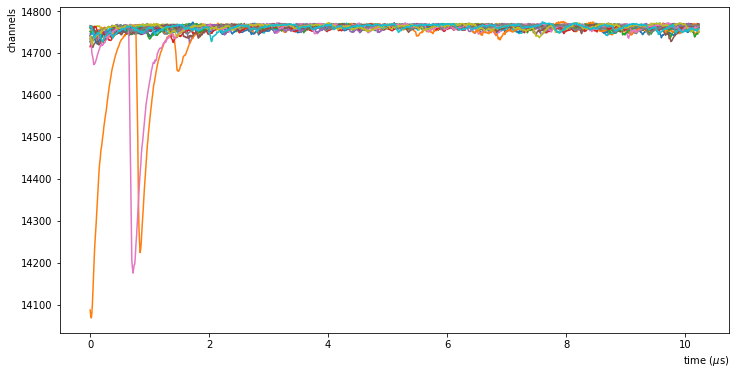

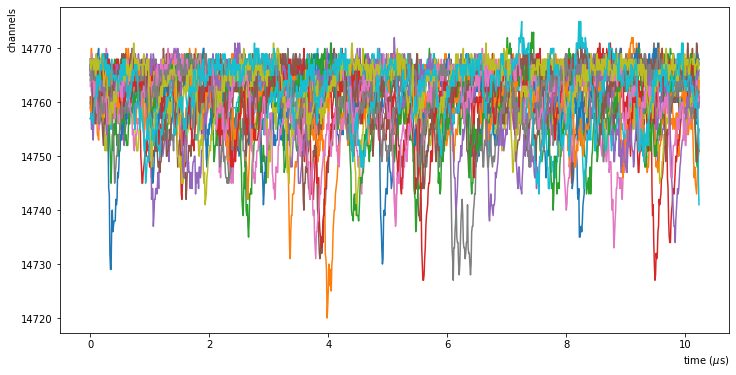

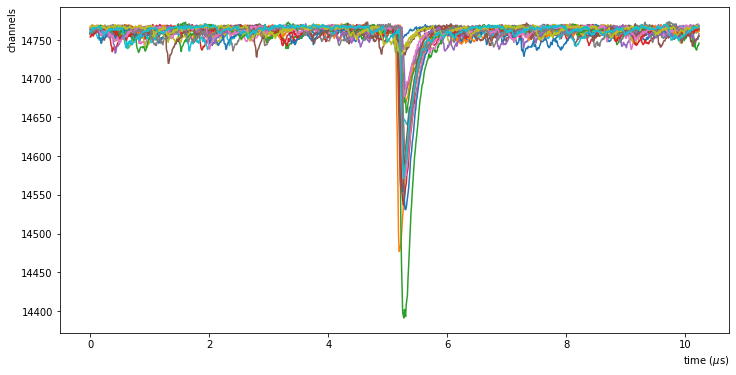

In [4]:
new_data, new_wf = pau.select_data(dataLED,filename=file_LED,fvolt=15,entr_cut=200,
                                  max_cut=1,area_cut=(0,1e7), pos_cut=(500,550),rt_cut=0,events=20)

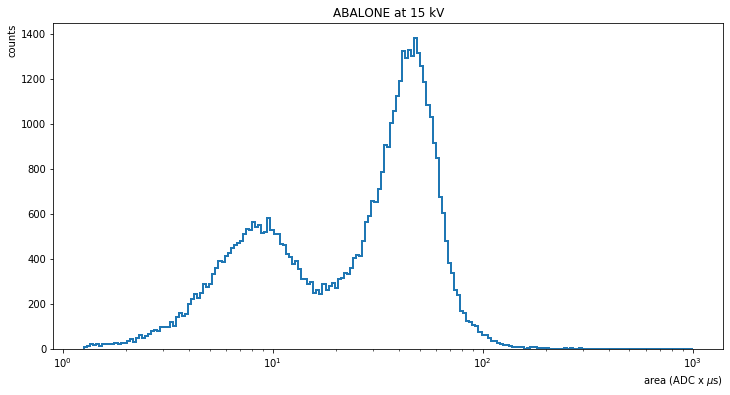

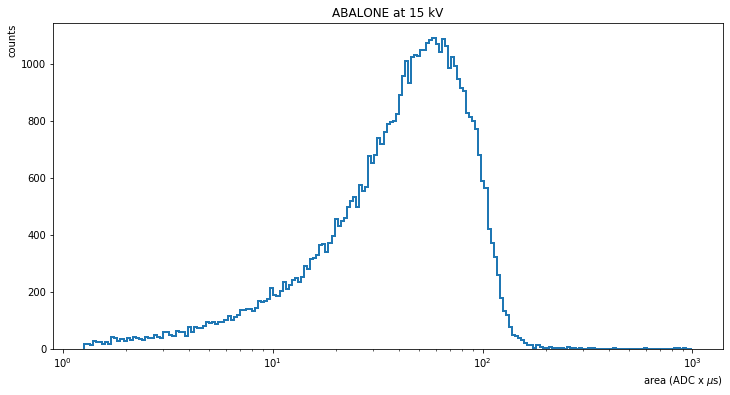

<Figure size 864x432 with 0 Axes>

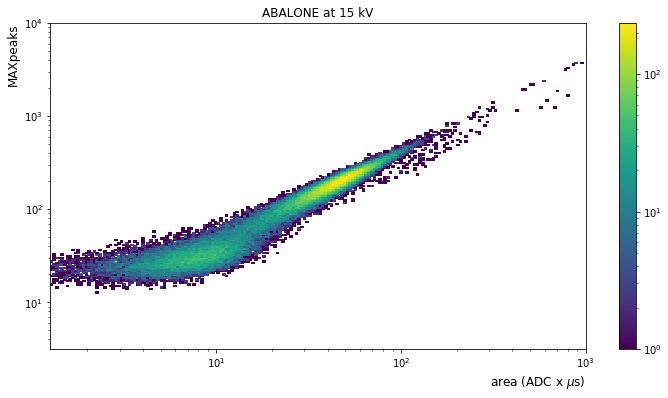

<Figure size 864x432 with 0 Axes>

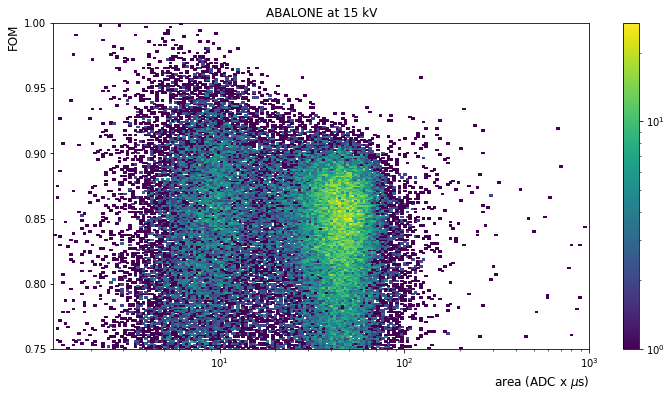

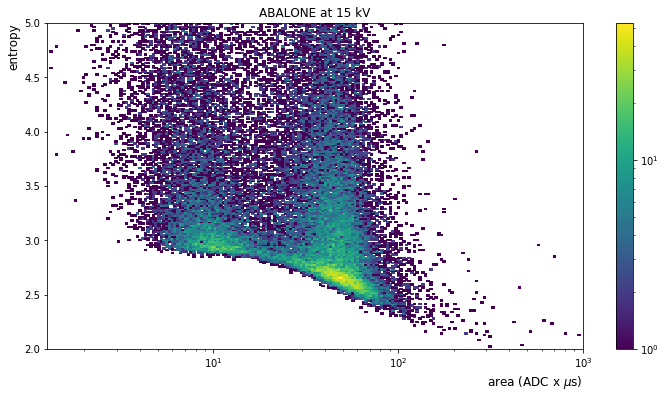

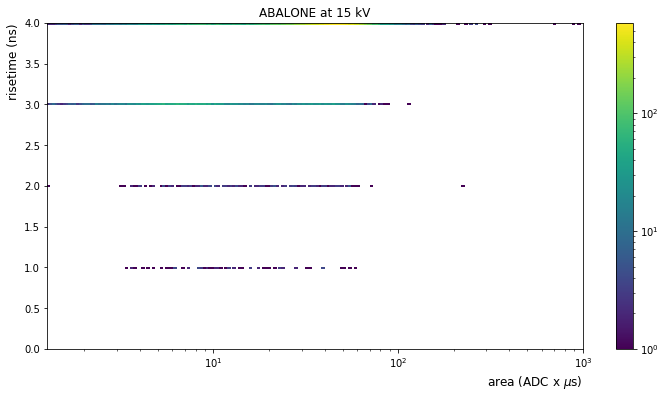

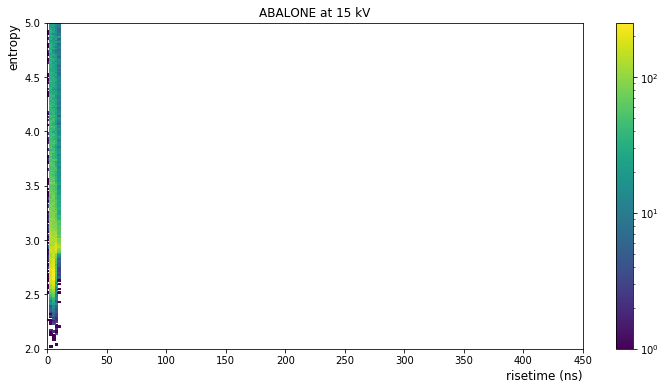

In [5]:
pau.plot_data(data=new_data,fvolt=15,low=0.1, high=3,low_max=0.5,high_max=4,low_en=2, high_en=5,
          low_fom=0.75,high_fom=1)

n. events 8733 waveform samples 1024


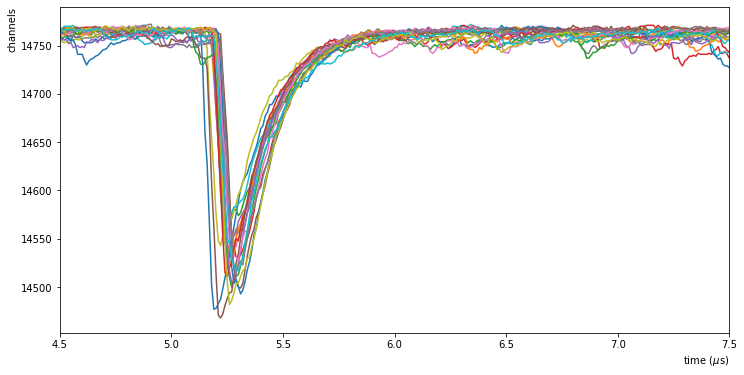

In [6]:
wf2 = new_wf[(new_data['area']>50)&(new_data['area']<70)]
psu.plot_waveforms( wf2,events=20,tlim=(4.5,7.5))

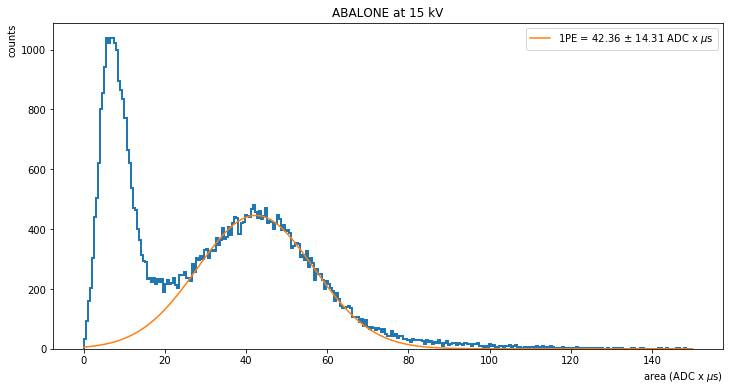

In [21]:
popt = pau.fit_pe_spectrum(new_data['area'], volts = 15, low = 0, high = 150, bins = 300, fit_range=(30,70))

In [22]:
popt[1]/1.113

38.06108723499814

In [13]:
#peakint = np.load('processed_data/peakint_ABALONE_20kV_SiPM2_32V.npy')
peakint = pau.calculate_integrals( new_wf, nn = 0, volts = 15, sipmv = 32, ledv = '3p0', plot = 0, save = 1 )

Total events: 53146
event n. 0 area: 1.81, time to process: 0.00
event n. 1000 area: 49.14, time to process: 5.33
event n. 2000 area: 55.62, time to process: 10.49
event n. 3000 area: 4.76, time to process: 15.65
event n. 4000 area: 4.09, time to process: 20.78
event n. 5000 area: 20.17, time to process: 25.92
event n. 6000 area: 44.84, time to process: 30.96
event n. 7000 area: 51.02, time to process: 36.02
event n. 8000 area: 35.73, time to process: 41.33
event n. 9000 area: 47.80, time to process: 46.45
event n. 10000 area: 22.29, time to process: 51.54
event n. 11000 area: 28.63, time to process: 56.74
event n. 12000 area: 37.97, time to process: 61.90
event n. 13000 area: 25.02, time to process: 67.04
event n. 14000 area: 51.58, time to process: 72.26
event n. 15000 area: 18.36, time to process: 77.39
event n. 16000 area: 10.28, time to process: 82.58
event n. 17000 area: 7.38, time to process: 87.68
event n. 18000 area: 5.67, time to process: 92.91
event n. 19000 area: 7.99, time

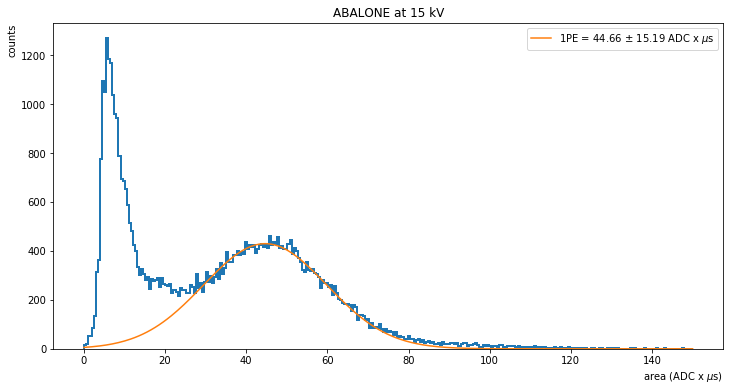

In [19]:
popt = pau.fit_pe_spectrum(peakint, volts = 15, low = 0, high = 150, bins = 300, fit_range=(30,70))

In [20]:
popt[1]/1.113

40.12882487202684